We need to understand the factors on which the pricing of cars depends.

#### The company wants to know:
1. Which variables are significant in predicting the price of a car.
2. How well those variables describe the price of a car

#### Goal
1. We are required to model the price of cars with the available independent variables. 
2. It will be used by the management to understand how exactly the prices vary with the independent variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

In [2]:
price=pd.read_csv('../input/car-price-prediction/CarPrice_Assignment.csv')

### Looking at the data

In [3]:
price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


The maximum **enginesize** seems to be a outlier, since 75% of the values of this feature are less than 141 which is less than half of the maximum value, the same thing can also be observed in **compressionratio, horsepower** we'll have look at them later to be sure about it.

In [6]:
price.corr()['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

We can observe that among the numerical features enginesize, curbweight, horsepower, carwidth, carlength,wheelbase, boreratio, citympg and higwaympg have considerable correlationw with the price of the car

In [7]:
price['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Replacing the name of car by name of company

In [8]:
price['company'] = [x.split()[0] for x in price['CarName']]
price['company'] = price['company'].replace({'maxda': 'Mazda','mazda': 'Mazda', 
                                     'nissan': 'Nissan', 
                                     'porcshce': 'Porsche','porsche':'Porsche', 
                                     'toyouta': 'Toyota', 'toyota':'Toyota',
                            'vokswagen': 'Volkswagen', 'vw': 'Volkswagen', 'volkswagen':'Volkswagen'})

In [9]:
price.drop(['CarName','car_ID'],axis=1,inplace=True)

### Plots
1. num_atr --> Numerical attributes
2. cat_atr --> Categorical attributes

In [10]:
num_atr=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio', 'horsepower','peakrpm','citympg','highwaympg','price']

cat_atr=['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','company']

#### Numerical Data Visualizations

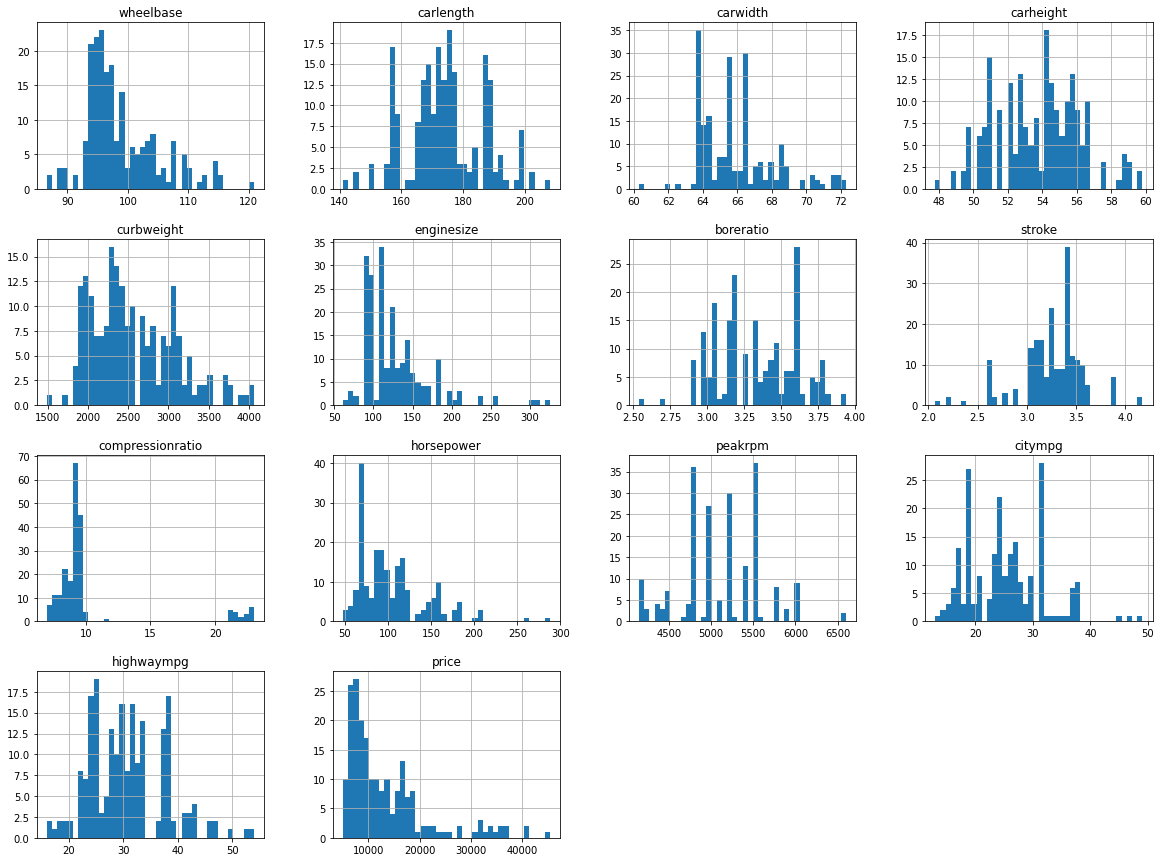

In [11]:
price[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

We can observe that some of the numerical features are skewed towards left, specially the features which have positive strong correlation with price, so we will scale the data before training our model

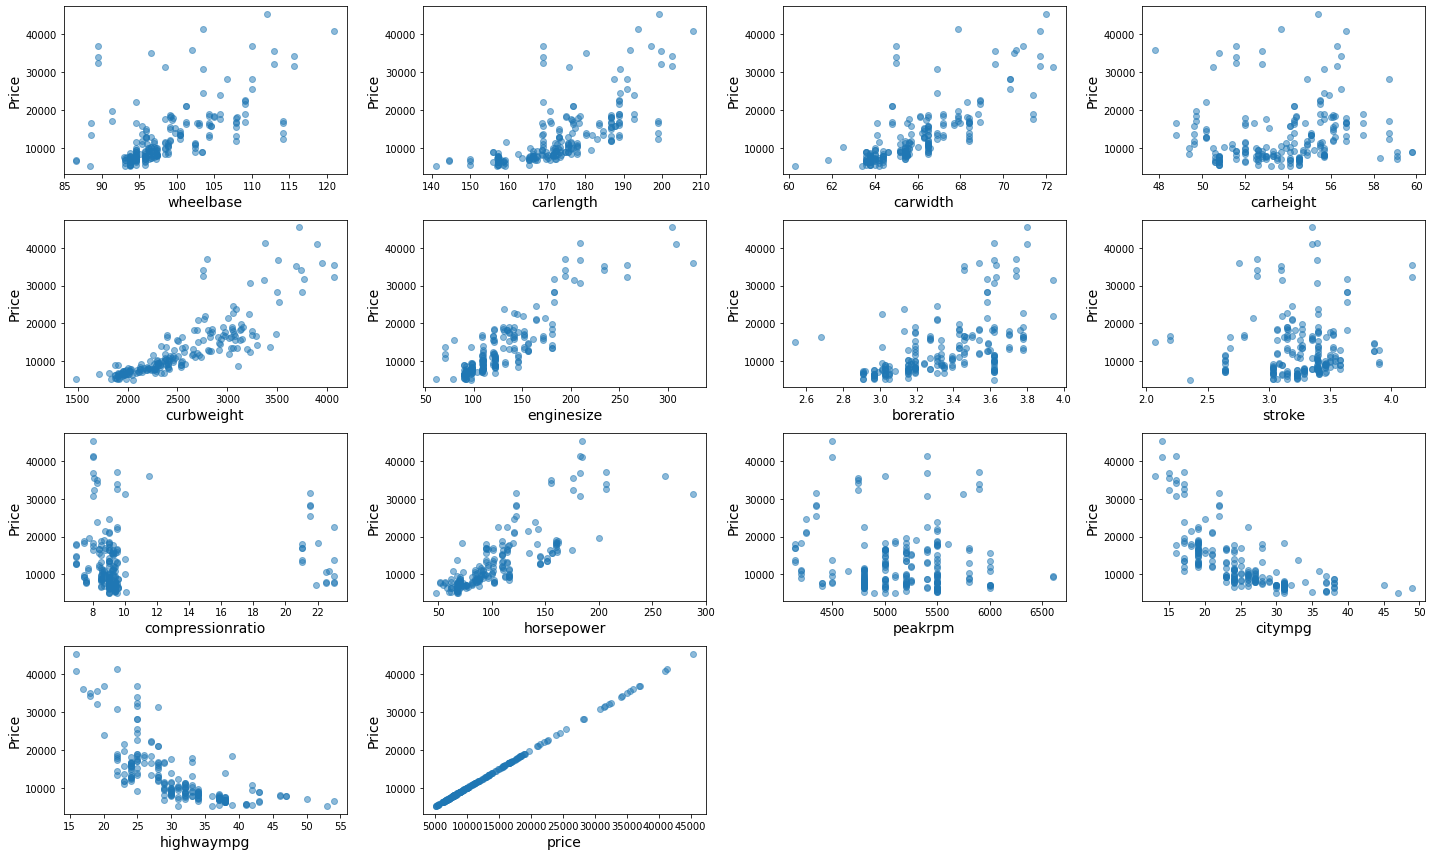

In [12]:
plt.figure(figsize=(20,12))
x=1
for i in num_atr:
    plt.subplot(4,4,x)
    plt.scatter(data=price,y='price',x=i,alpha=0.5)
    plt.ylabel('Price',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1

So, earlier we saw that there might be some outliers in some features but now we can see from the scatter plot that some values in horsepower and engine size are high but they seems to follow the trends with price so we don't need to remove them. 

For compressionratio, we can observe that it can be converted into classes (high and low) and the prices does not seem to depend on it, we may either remove it or convert it into categorical attribute as low and high.

We can also observe that some features seems to show a quadratic relationship with price, we should remember this point and maybe use it for selecting our ML model

#### Categorical Data Visualizations

In [13]:
bins = (0, 15, np.inf)
group_names = ['low', 'high']
price['compressionratio'] = pd.cut(price['compressionratio'], bins = bins, labels = group_names)

num_atr.remove('compressionratio')
num_atr.remove('price')
cat_atr.append('compressionratio')

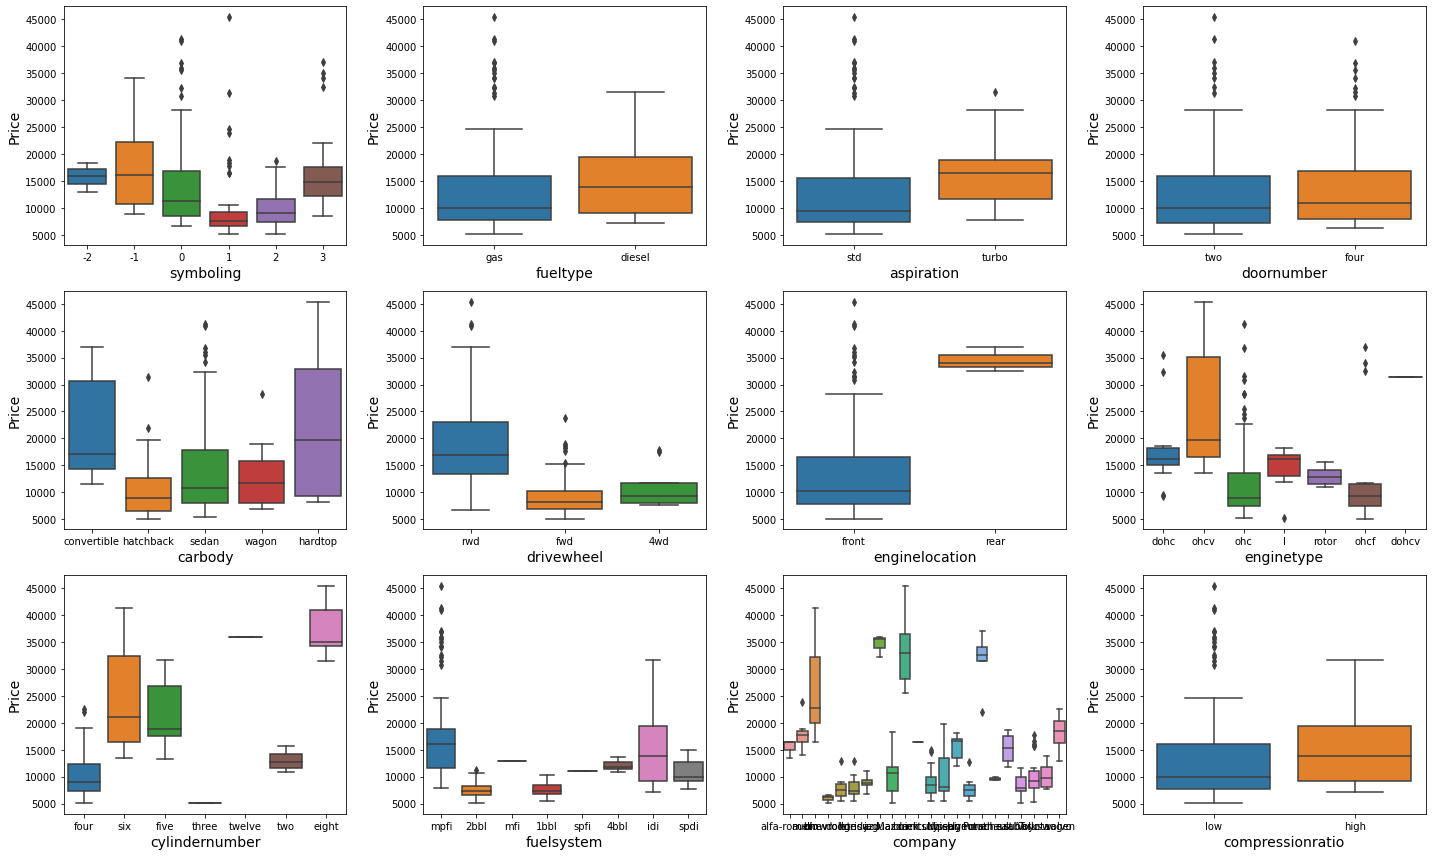

In [14]:
plt.figure(figsize=(20,12))
x=1
for i in cat_atr:
    plt.subplot(3,4,x)
    sns.boxplot(data=price,y='price',x=i)
    plt.ylabel('Price',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1

Okay, this is a lot of data, lets break each feature one by one:
1. <u>symboling</u>: more -ve value means car is more safe and more +ve means it is risky, the plot shows more safe as well as more risky cars are expensive and most of the affordable cars fall between 0 to 2, this type of variation might be because of some other features in car.
2. <u>fueltype</u>: doesn't matter for most cars, but the highly expensive cars mostly runs on gas.
3. <u>aspiration</u>: doesn't matter for most cars, but highly expensive cars mostly have std.
4. <u>doornumber</u>: doesn't matter except for some outlier for 2 door cars.
5. <u>carbody</u>: if the body of the car is hardtop, it is pretty likely that it will be expensive.
6. <u>drivewheel</u>: car with rwd class drivewheel are generally expensive.
7. <u>enginelocation</u>: cars which have engine at their back are mostly expensive but majority of the cars have engine in the front.
8. <u>enginetype</u>: cars with 'ochv' engine type are expensive.
9. <u>cylindernumber</u>: cars with eight cylinders are generally expensive followed by six and five.
10. <u>fuelsystem</u>: 'mpfi' fuel system cars are slightly expensive than others.
11. <u>company</u>: prices does depend on the company, some have high and some have low prices.
12. <u>compressionratio</u>: doesn't matter for most cars, but there highly is a slight difference in mean price for both the classes.

So, upto now we can conclude that the following variables are really helpful in determining the price of the car:

Numerical Attributes:
1. features enginesize 
2. curbweight
3. horsepower
4. carwidth
5. carlength
6. wheelbase
7. boreratio
8. citympg
9. higwaympg

Categorical Attributes:
1. symboling
2. carbody
3. drivewheel
4. enginelocation
5. enginetype
6. cylindernumber
7. fuelsystem
8. company

Note: fueltype aspiration and compressionratio are important to some extent because expensive cars tends to have only one class from these.

## Preparation for ML

What do we need to do for preparing the data?
1. use pd.get_dummies to encode the categorical attributes.

2. scale the data.

In [15]:
price = pd.get_dummies(price, columns=cat_atr, drop_first=True)
price.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,...,company_jaguar,company_mercury,company_mitsubishi,company_peugeot,company_plymouth,company_renault,company_saab,company_subaru,company_volvo,compressionratio_high
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,5000,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,5000,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154,5000,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,102,5500,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,115,5500,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X= price.drop(['price'],axis=1)
y= price['price']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
atr=X_train.select_dtypes('number').columns

In [18]:
pipe = make_column_transformer((StandardScaler(),atr),remainder='passthrough')

In [19]:
pipe.fit(X_train)
pipe.fit(X_test)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'fueltype_gas', 'aspiration_turbo',
       'doornu...
       'company_Porsche', 'company_Toyota', 'company_Volkswagen',
       'company_alfa-romero', 'company_audi', 'company_bmw', 'company_buick',
       'company_chevrolet', 'company_dodge', 'company_honda', 'company_isuzu',
       'company_jaguar', 'company_mercury', 'company_mitsubishi',
       'company_peugeot', 'company_plymouth', 'company_renault',
       'company_saab', 'company_subaru', 'company_volvo',
       'compressionratio_high'],
      dtype='object'))])

## User-Defined Functions

In [20]:
#Learning Curve
#give training set and training labels as parameter, they will be then split in training and validation sets
def plot_learning_curve(model,X,y):   
    X_train_lc,X_val_lc,y_train_lc,y_val_lc=train_test_split(X,y,test_size=0.2,random_state=42)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train_lc[:m],y_train_lc[:m])
        y_train_predict=model.predict(X_train_lc[:m])
        y_val_predict=model.predict(X_val_lc)
        train_errors.append(mean_squared_error(y_train_lc[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val_lc,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')       
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')
    plt.ylim(0,10000)
    plt.legend()
    plt.grid()
    plt.xlabel('No. of instances in training set')
    plt.ylabel('RMSE')
    plt.title("Learning Curve")

In [21]:
def initial_check(model,X_train,y_train):
    rmse_score=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
    r2_score=cross_val_score(model,X_train,y_train,scoring='r2',cv=10)
    print("RMSE (cross_val_score): ",np.sqrt(-rmse_score).mean())
    print("R2 Score (cross_val_score): ",r2_score.mean())
    plot_learning_curve(model,X_train,y_train)
    plt.show()

## ML model
1. X_train --> Training data
2. y_train --> Training labels

3. X_test --> Test Data
4. y_test --> Test Labels

### i. Linear Regression

RMSE (cross_val_score):  2945.8031840451395
R2 Score (cross_val_score):  0.7744684526031028


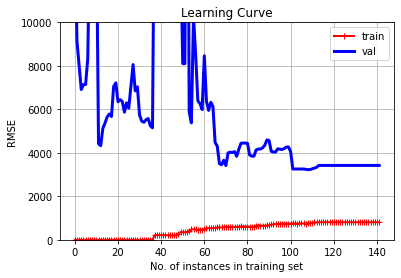

In [22]:
lin_reg=LinearRegression()
initial_check(lin_reg,X_train,y_train)


The RMSE is not so good considering cost of 50% of the cars is less than almost $10,000.

The leaning curve shows us the model's performance on the training set and the validation set as a function of training set size. We can observe that the error on the training data is much lower than validation data and there is large gap between the curves. This means the model performs significantly better on the training data than on the validation data, which is hall-mark of an overfitting model.

NOTE that I've set the range for y-axis from 0 to 10000, the plot goes beyond that upto 200000 at its peak, this is done for better visualization.

Lets try regularizing the model.

##### Ridge

RMSE (cross_val_score):  2288.269171776404
R2 Score (cross_val_score):  0.8933462079616288


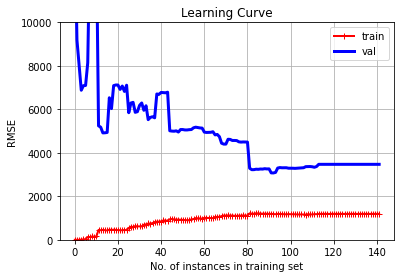

In [23]:
ridge_reg=Ridge(alpha=1.4)
initial_check(ridge_reg,X_train,y_train)

The RMSE decreased and the gap between the curves is also less

Lets explore some more options then we'll go to polynomial regression

### ii. Polynomial Regression

In [24]:
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_train_poly=poly_features.fit_transform(X_train)
X_train_poly=StandardScaler().fit_transform(X_train_poly)

X_test_poly=poly_features.fit_transform(X_test)
X_test_poly=StandardScaler().fit_transform(X_test_poly)

RMSE (cross_val_score):  7261695068111075.0
R2 Score (cross_val_score):  -1.7964724616741023e+24


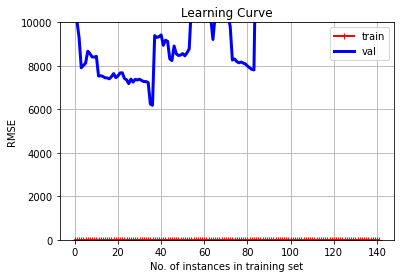

In [25]:
initial_check(lin_reg,X_train_poly,y_train)

This model is severly overfitted as expected, the Learning Curve stays above 10000 for most of the time, showing that the model is too overfitted. Now, I am going to regularization it.

RMSE (cross_val_score):  2268.3624748377706
R2 Score (cross_val_score):  0.877274697934342


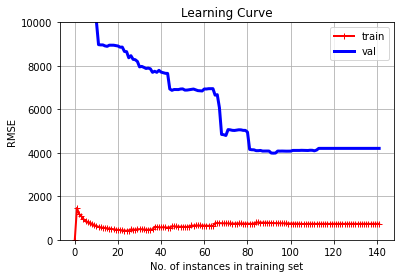

In [26]:
poly_ridge_reg=Ridge(alpha=120)
initial_check(poly_ridge_reg,X_train_poly,y_train)

We have come from a score of 2945 to 2268 by using polynomial regression instead of linear regression but the R2 score has been decreased, also there is a large gap in Learning Curve which represens overfitting hence the model might not be generalized well. So its performance might vary with test/new data.

### iii. RandomForestRegressor

RMSE (cross_val_score):  2325.721727275087
R2 Score (cross_val_score):  0.8657467722806025


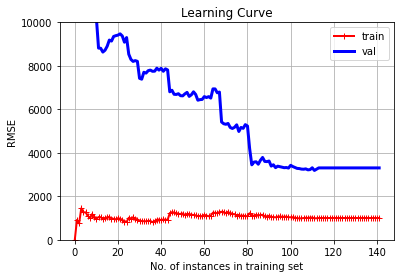

In [27]:
forest_reg=RandomForestRegressor(random_state=42)
initial_check(forest_reg,X_train,y_train)

RandomForestRegressor gives the best results without adjusting the hyperparameter and the gap in Learning Curve is also less, lets try adjusting its hyperparameters to make it better.

## Fine tuning the best model (RandomForestRegressor)

In [28]:
param_grid=([
    {'n_estimators':[180,190,200]}
])

In [29]:
grid_search=GridSearchCV(forest_reg,param_grid,cv=10,scoring='r2',return_train_score=True)

In [30]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'n_estimators': [180, 190, 200]}],
             return_train_score=True, scoring='r2')

In [31]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=200, random_state=42)

In [32]:
final_reg=grid_search.best_estimator_

Now we have the best model from GridSearchCV.

## Testing 

In [33]:
final_reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [34]:
predictions=final_reg.predict(X_test)

In [35]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)))
print("R2 Score: ",r2_score(y_test,predictions))

RMSE:  1964.6478625783077
R2 Score:  0.9442898774399162


On testing, we can observe that the model hai performed well on the test set, the RMSE value is the least and R2 score is the highest.

In [36]:
importances = final_reg.feature_importances_
feature_names = X.columns

l=len(final_reg.feature_importances_)
df=pd.DataFrame(importances,columns=['importance'],index=feature_names)
df.sort_values('importance',ascending=False,inplace=True)

In [37]:
df[df['importance']>0.001]

,importance
enginesize,0.610076
curbweight,0.166821
highwaympg,0.115382
horsepower,0.027864
carwidth,0.016614
carlength,0.012095
wheelbase,0.008835
company_bmw,0.006050
peakrpm,0.005695
boreratio,0.004456


The above DataFrame gives the most important features for determining the cost of a car.